In [1]:
!pip install pandas openpyxl matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
file_path = r"C:\Users\Ap computers\Documents\PROJECTS\SHADOWFOX INTERNSHIP TASKS\ADVANCE TASK\CRICKET FIELDING ANALYSIS\IPL sample data.xlsx"
df = pd.read_excel(file_path, skiprows=4)
df.head()


,Unnamed: 0,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
0,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1,1,Delhi,Arun Jaitly Stadium
1,NaN,IPL2367,1,Delhi Capitals,Phil Salt,0.2,wicket keeper,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
2,NaN,IPL2367,1,Delhi Capitals,Yash Dhull,0.3,covers,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
3,NaN,IPL2367,1,Delhi Capitals,Axer Patel,0.4,point,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
4,NaN,IPL2367,1,Delhi Capitals,NaN,0.5,NaN,NaN,NaN,NaN,1,Delhi,Arun Jaitly Stadium


In [4]:
# Convert Pick and Throw columns to lowercase
df['Pick'] = df['Pick'].astype(str).str.lower()
df['Throw'] = df['Throw'].astype(str).str.lower()

# Group by player
performance = df.groupby('Player Name').agg(
    Clean_Picks=('Pick', lambda x: (x == 'clean pick').sum()),
    Good_Throws=('Pick', lambda x: (x == 'good throw').sum()),
    Catches=('Pick', lambda x: (x == 'catch').sum()),
    Dropped_Catches=('Pick', lambda x: (x == 'drop catch').sum()),
    Runs_Saved=('Runs', 'sum')
).reset_index()


In [5]:
# STEP 5: Clean Dataset
df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)
df = df[df['Player Name'].notna()]

# Remove numeric or fake player names
df = df[df['Player Name'].astype(str).str.contains('[A-Za-z]', regex=True)]

# Convert Runs to numeric
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce').fillna(0)

df.head()


,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
0,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,nan,1.0,1,Delhi,Arun Jaitly Stadium
1,IPL2367,1,Delhi Capitals,Phil Salt,0.2,wicket keeper,y,y,0.0,1,Delhi,Arun Jaitly Stadium
2,IPL2367,1,Delhi Capitals,Yash Dhull,0.3,covers,y,y,0.0,1,Delhi,Arun Jaitly Stadium
3,IPL2367,1,Delhi Capitals,Axer Patel,0.4,point,y,y,0.0,1,Delhi,Arun Jaitly Stadium
5,IPL2367,1,Delhi Capitals,Lalit yadav,0.6,cover point,y,y,0.0,1,Delhi,Arun Jaitly Stadium


In [6]:
performance = df.groupby('Player Name').agg(
    Clean_Picks=('Pick', lambda x: (x == 'clean pick').sum()),
    Good_Throws=('Pick', lambda x: (x == 'good throw').sum()),
    Catches=('Pick', lambda x: (x == 'catch').sum()),
    Dropped_Catches=('Pick', lambda x: (x == 'drop catch').sum()),
    Runs_Saved=('Runs', 'sum')
).reset_index()


In [7]:
# Group by player and calculate metrics
performance = df.groupby('Player Name').agg(
    Clean_Picks=('Pick', lambda x: (x == 'clean pick').sum()),
    Good_Throws=('Pick', lambda x: (x == 'good throw').sum()),
    Catches=('Pick', lambda x: (x == 'catch').sum()),
    Dropped_Catches=('Pick', lambda x: (x == 'drop catch').sum()),
    Runs_Saved=('Runs', 'sum')
).reset_index()

# Define weights
WCP, WGT, WC, WDC = 2, 3, 5, -3

# Calculate Performance Score
performance['PS'] = (performance['Clean_Picks'] * WCP) + \
                    (performance['Good_Throws'] * WGT) + \
                    (performance['Catches'] * WC) + \
                    (performance['Dropped_Catches'] * WDC) + \
                    performance['Runs_Saved']

# Sort players by performance score
performance = performance.sort_values(by='PS', ascending=False).reset_index(drop=True)

# Display first 10 players
performance.head(10)


,Player Name,Clean_Picks,Good_Throws,Catches,Dropped_Catches,Runs_Saved,PS
0,Rilee russouw,0,0,0,0,1.0,1.0
1,Aman Khan,0,0,0,0,0.0,0.0
2,Catches (C),0,0,0,0,0.0,0.0
3,Axer Patel,0,0,0,0,0.0,0.0
4,Kuldeep yadav,0,0,0,0,0.0,0.0
5,Lalit yadav,0,0,0,0,0.0,0.0
6,Phil Salt,0,0,0,0,0.0,0.0
7,Yash Dhull,0,0,0,0,0.0,0.0


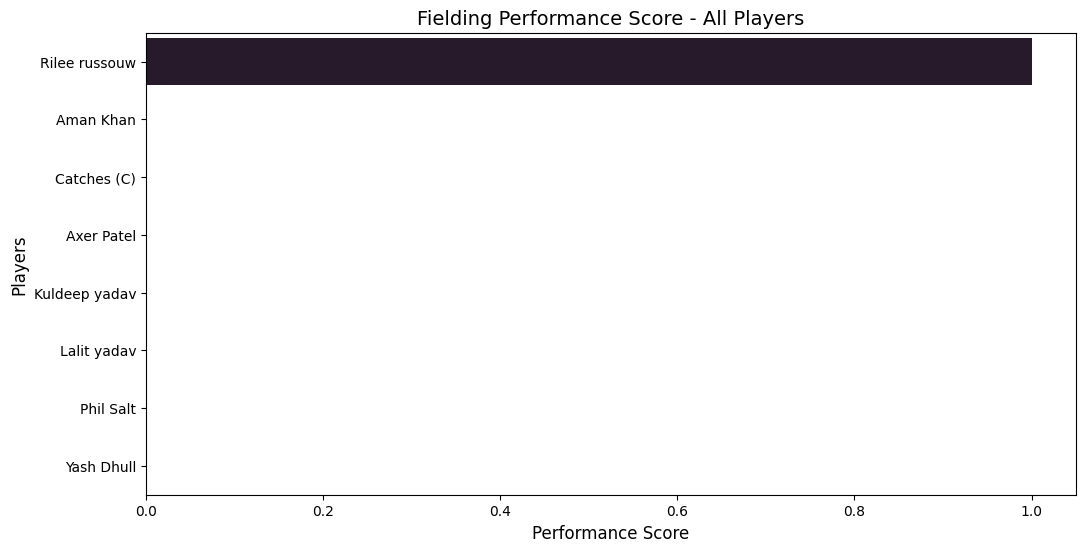

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(y='Player Name', x='PS', hue='Player Name', data=performance, palette='mako', legend=False)
plt.title("Fielding Performance Score - All Players", fontsize=14)
plt.xlabel("Performance Score", fontsize=12)
plt.ylabel("Players", fontsize=12)
plt.show()

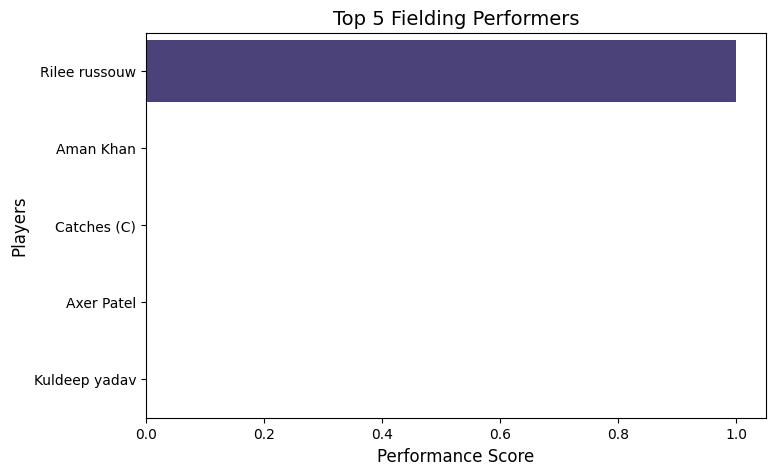

Top 5 Players:
      Player Name  Clean_Picks  Good_Throws  Catches  Dropped_Catches  \
0  Rilee russouw            0            0        0                0   
1      Aman Khan            0            0        0                0   
2    Catches (C)            0            0        0                0   
3     Axer Patel            0            0        0                0   
4  Kuldeep yadav            0            0        0                0   

   Runs_Saved   PS  
0         1.0  1.0  
1         0.0  0.0  
2         0.0  0.0  
3         0.0  0.0  
4         0.0  0.0  


In [9]:
top_5 = performance.head(5)

plt.figure(figsize=(8, 5))
sns.barplot(y='Player Name', x='PS', hue='Player Name', data=top_5, palette='viridis', legend=False)
plt.title("Top 5 Fielding Performers", fontsize=14)
plt.xlabel("Performance Score", fontsize=12)
plt.ylabel("Players", fontsize=12)
plt.show()

print("Top 5 Players:\n", top_5)
